<h1><center>𝕸𝖊𝖙𝖆𝖑 𝕭𝖆𝖓𝖉𝖘 🇧​​​​​🇾​​​​​ 🇳​​​​​🇦​​​​​🇹​​​​​🇮​​​​​🇴​​​​​🇳​​​​​</center></h1>
<center>
1964 ~ 2016
<br>
<br>

#### **Introdução à Ciência dos Dados**
*Professor Luciano Barbosa*<br><br>

**Grupo**<br>
🤘 Arianne Macena [@annemacena](https://github.com/annemacena) - asm7@cin.ufpe.br<br>
🤘 Otávio Kamel [@otaviokamel](https://github.com/otaviokamel) - oackb@cin.ufpe.br
<br><br>
<img src="https://media.giphy.com/media/XcLpNX8NFvhAc/giphy.gif" align="center"></center>

# Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Descrição dos dados

In [2]:
df = pd.read_csv('metal_bands_2017.csv')

In [3]:
df.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


In [4]:
df.shape

(5000, 7)

In [5]:
df.isna().sum()

Unnamed: 0    0
band_name     0
fans          0
formed        0
origin        8
split         0
style         0
dtype: int64

In [6]:
df[df['origin'].isna()]

,Unnamed: 0,band_name,fans,formed,origin,split,style
460,460,Enshine,175,2009,NaN,-,Gothic doom
989,989,Clouds,61,2013,NaN,2013,Atmospheric doom
1422,1422,Subterranean Masquerade,35,1997,NaN,-,"Progressive,Psychedelic rock"
2614,2614,Twilight Of The Gods,11,2010,NaN,-,Heavy
2996,2996,Archivist,7,2015,NaN,-,"Atmospheric black,Post-metal"
3444,3444,Metallic Taste Of Blood,5,2011,NaN,-,"Progressive,Instrumental"
3941,3941,Level 10,3,2014,NaN,2014,"Heavy,Power"
4201,4201,Death Penalty,2,2013,NaN,2013,"Doom,Heavy"


In [36]:
df.describe()

,fans,formed
count,4988.000000,4988.000000
mean,87.956095,2000.400762
std,296.468228,8.880372
min,0.000000,1964.000000
25%,4.000000,1995.000000
50%,12.000000,2002.000000
75%,42.000000,2007.000000
max,4195.000000,2016.000000


In [37]:
df.describe(include='object')

,band_name,origin,split,style
count,4988,4988,4988,4988
unique,4937,113,50,1226
top,Metallica,USA,-,Black
freq,2,1138,2206,345


In [39]:
# - é para bandas que não se separaram
df['split'].unique()

array(['-', '1990', '1983', '1981', '2001', '1985', '1996', '1969',
       '2003', '1989', '2016', '1995', '1991', '1993', '2004', '1988',
       '1994', '1980', '2010', '1984', '1997', '1973', '2000', '1975',
       '1999', '1987', '1968', '1979', '1992', '2002', '1965', '2005',
       '2008', '1978', '1982', '1998', '1976', '1986', '2006', '2011',
       '2007', '2014', '1972', '2015', '2013', '2009', '1967', '1977',
       '2012', '1974'], dtype=object)

# Pré-Processamento

In [9]:
df.dtypes

Unnamed: 0     int64
band_name     object
fans           int64
formed        object
origin        object
split         object
style         object
dtype: object

In [10]:
df['formed'].unique()

array(['1975', '1990', '1981', '1983', '1988', '1985', '1968', '1996',
       '1993', '1969', '1984', '1989', '1995', '1991', '1982', '2004',
       '1997', '1978', '2002', '1999', '1994', '1987', '1992', '1980',
       '1973', '2000', '1998', '2003', '1986', '1979', '2001', '2007',
       '2008', '1965', '2005', '1976', '1964', '1972', '2006', '1977',
       '2011', '2010', '2009', '2013', '1971', '1967', '2015', '2012',
       '2014', '1970', '1974', '2016', '-'], dtype=object)

In [11]:
df[df['formed'] == '-']

,Unnamed: 0,band_name,fans,formed,origin,split,style
4442,4442,Throes Of Sanity,2,-,USA,-,Us power
4599,4599,Doomocracy,1,-,Greece,-,Doom
4821,4821,Rustless,1,-,Italy,-,Heavy
4948,4948,Weapon UK,1,-,United Kingdom,-,"New wave of british heavy,Heavy"


In [12]:
df['formed'].max()

'2016'

In [13]:
# tratar o missing data -> -
# colocar ano de formaçõa dessas bandas com missing values como 2017? pois praticamente não tem fãs, então devem ser recentes?

In [14]:
#df['formed'].astype('int64')

In [15]:
# a coluna Unnamed: 0 é apaenas repetição do index do dataframe
(df.index == df['Unnamed: 0']).sum()

5000

In [16]:
df.drop(columns=['Unnamed: 0'], inplace=True)

# Missing data

- imputar como? knn?
- manualmente?
- moda?


## detectar outliers

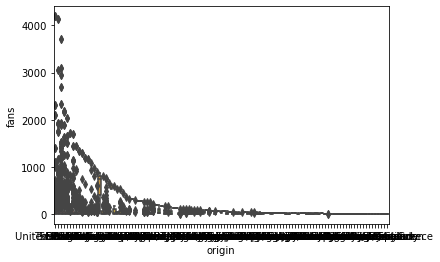

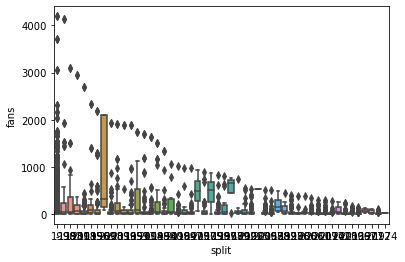

In [35]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 1000:
        sns.boxplot(x=column, data=df, y='fans')
        plt.show()

## normalizar dados
- min max
- robust Scaler 
- standard scaler

## Análises

### Tempo de Duração das Bandas

In [92]:
df[df['split'] == '-'].index

Int64Index([   0,    2,    4,    8,   10,   12,   18,   20,   22,   24,
            ...
            4978, 4980, 4982, 4984, 4986, 4988, 4990, 4992, 4994, 4996],
           dtype='int64', length=2206)

In [93]:
# para efeitos de comparação, bandas cujo ano de split é igual a "-" foram considerados bandas que ainda estão juntas
df_split = df.drop(df[df['split'] == '-'].index)
df_non_split = df.drop(df[df['split'] != '-'].index)

In [94]:
df_split.shape

(2782, 6)

In [95]:
df_non_split.shape

(2206, 6)

In [96]:
# como as bandas cujo valor de split é igual a "-" consideramos como ainda em andamento, colocaremos o ano de 2017 (pois os valores do dataset vão até 2016), para considerar o tempo que as bandas estão juntas

In [97]:
df_non_split['split'].sample(10)

502     -
1424    -
3752    -
4692    -
694     -
4982    -
3822    -
3656    -
2362    -
628     -
Name: split, dtype: object

In [98]:
df_non_split['split'] = 2017

In [99]:
df_non_split['split'].sample(10)

3468    2017
4690    2017
1116    2017
1672    2017
3136    2017
4980    2017
4966    2017
4026    2017
728     2017
2524    2017
Name: split, dtype: int64

In [109]:
df_split['split'].sample(10)

1787    2002
1705    2000
371     2000
925     1981
2219    2003
1505    2012
1721    2009
1289    2006
4937    2002
3781    2003
Name: split, dtype: int64

In [110]:
df_non_split['split'].sample(10)

58      2017
4800    2017
1162    2017
1192    2017
4144    2017
4494    2017
4066    2017
1326    2017
930     2017
2370    2017
Name: split, dtype: int64

In [106]:
df_split['split'] = df_split['split'].astype('int64')

In [107]:
df_split['band_duration'] = df_split['split'] - df_split['formed']

In [108]:
df_split.sample(10)

,band_name,fans,formed,origin,split,style,band_duration
4060,Thy Flesh Consumed,3,2001,Canada,2010,Death,9
3010,Bone Gnawer,7,2009,Sweden,2015,Death,6
1193,Sulphur Aeon,46,2010,Germany,2010,Death,0
4205,Desolate Pathway,2,2013,United Kingdom,2013,Epic doom,0
3336,Apati,5,2008,Sweden,2011,Depressive black,3
3243,Joel Grind,6,2012,USA,2012,"Black,Speed",0
2891,Greymachine,8,2009,United Kingdom,2009,"Experimental industrial,Avantgarde",0
3337,Apotheosis,5,1993,Malta,1993,"Symphonic black,Thrash",0
2947,Sorcier Des Glaces,8,1997,Canada,1997,Black,0
4239,Exiled,2,1997,USA,1997,"Power,Speed,Thrash",0


In [111]:
df_non_split['band_duration'] = df_non_split['split'] - df_non_split['formed']

In [112]:
df_non_split.sample(10)

,band_name,fans,formed,origin,split,style,band_duration
2230,Howls Of Ebb,15,2012,USA,2017,"Black,Death",5
1192,ReinXeed,46,2002,Sweden,2017,Power,15
1688,To Cast A Shadow,26,2005,Norway,2017,"Doom,Gothic",12
4590,Decease,1,2011,Romania,2017,"Death,Thrash",6
2858,Clandestine Blaze,8,1998,Finland,2017,Black,19
46,Enslaved,1146,1991,Norway,2017,"Viking black,Progressive black",26
1108,Akphaezya,52,2002,France,2017,Avantgarde,15
2654,Dee Snider,10,1997,USA,2017,Heavy,20
1684,Shakra,26,1997,Switzerland,2017,"Hard rock,Heavy",20
688,Brainstorm,101,1989,Germany,2017,Power,28


#### Bandas que terminaram

In [131]:
df_split['band_duration'].mean()

1.088785046728972

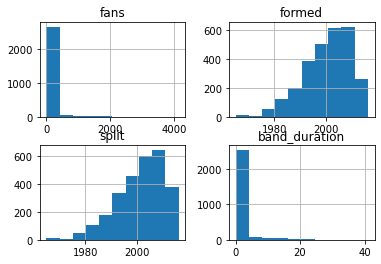

In [129]:
df_split.hist();

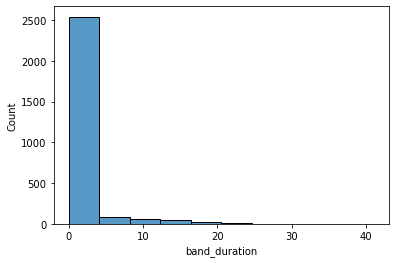

In [121]:
sns.histplot(data=df_split, x='band_duration', bins=10);

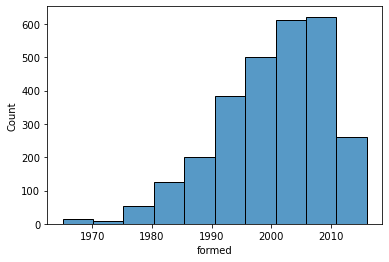

In [126]:
sns.histplot(data=df_split, x='formed', bins=10);

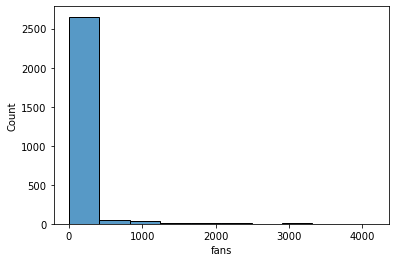

In [127]:
sns.histplot(data=df_split, x='fans', bins=10);

#### Bandas que continuam na ativa

In [132]:
df_non_split['band_duration'].mean()

16.26745240253853

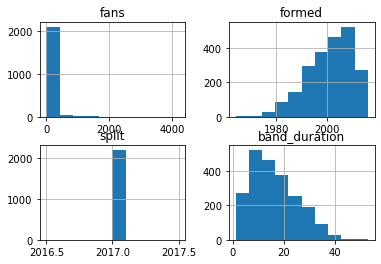

In [128]:
df_non_split.hist();

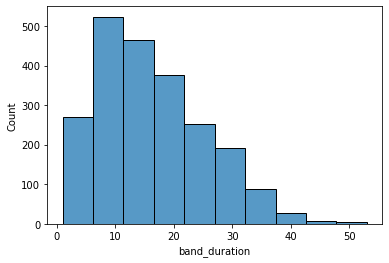

In [122]:
sns.histplot(data=df_non_split, x='band_duration', bins=10);

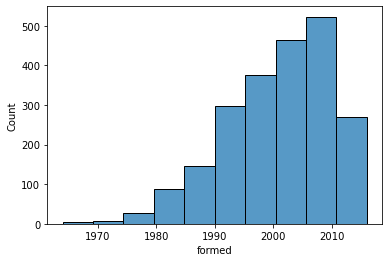

In [123]:
sns.histplot(data=df_non_split, x='formed', bins=10);

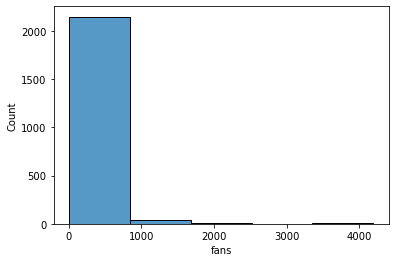

In [125]:
sns.histplot(data=df_non_split, x='fans', bins=5);

### Número de Fãs

In [17]:
df_fans_by_country = df[['origin', 'fans']].groupby('origin').mean().reset_index().sort_values('fans', ascending=False)
df_fans_by_country

,origin,fans
28,"Denmark, USA",583.000000
111,"United Kingdom, USA",561.333333
54,"Israel, The Netherlands",307.000000
1,Andorra,279.000000
102,"Tunisia, France",275.000000
...,...,...
0,Albania,2.000000
56,"Italy, Spain",1.000000
81,"Poland, Sweden",1.000000
112,Venezuela,1.000000


array([[<AxesSubplot:title={'center':'fans'}>]], dtype=object)

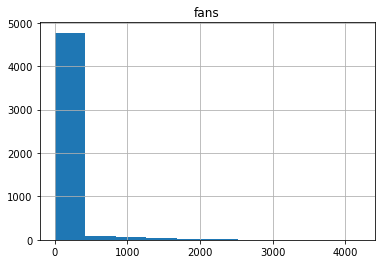

In [18]:
df.hist();

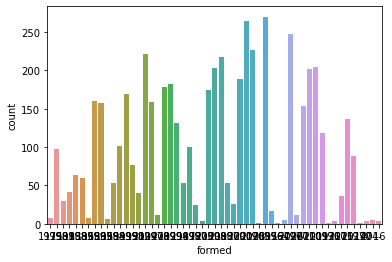

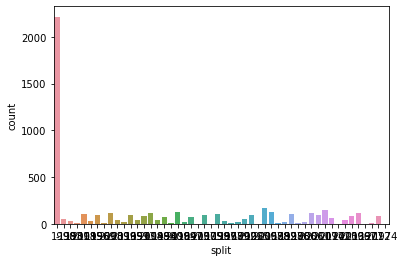

In [19]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 100:
        sns.countplot(x=column, data=df)
        plt.show()

In [20]:
# Verificando frequência relativa entre atributos categóricos com menos de 5 valores distintos
for col in df.drop('origin', axis=1).select_dtypes(include='object'):
    if df[col].nunique() <=100:
        display(pd.crosstab(df['origin'], df[col], normalize='index'))

formed,-,1964,1965,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
origin,,,,,,,,,,,,,,,,,,,,,
Albania,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Andorra,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Argentina,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.055556,0.000000,0.000000,0.111111,0.055556,0.000000,0.000000,0.0
Armenia,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Australia,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.007634,...,0.038168,0.045802,0.038168,0.106870,0.061069,0.007634,0.007634,0.022901,0.007634,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ukraine, Canada",0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
United Kingdom,0.002899,0.0,0.0,0.002899,0.011594,0.014493,0.0,0.0,0.0,0.002899,...,0.055072,0.075362,0.034783,0.049275,0.043478,0.037681,0.031884,0.008696,0.002899,0.0
"United Kingdom, Greece",0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


split,-,1965,1967,1968,1969,1972,1973,1974,1975,1976,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
origin,,,,,,,,,,,,,,,,,,,,,
Albania,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Andorra,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Argentina,0.555556,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000
Armenia,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,0.458015,0.0,0.0,0.000000,0.000000,0.0,0.007634,0.0,0.000000,0.000000,...,0.015267,0.015267,0.015267,0.083969,0.022901,0.000000,0.015267,0.015267,0.015267,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Ukraine, Canada",1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
United Kingdom,0.423188,0.0,0.0,0.002899,0.014493,0.0,0.000000,0.0,0.002899,0.005797,...,0.046377,0.055072,0.023188,0.023188,0.026087,0.026087,0.020290,0.008696,0.002899,0.008696
"United Kingdom, Greece",1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
df.dropna(inplace=True)

In [22]:
dropar_index = df[df['formed'] == '-'].index

In [23]:
df.drop(dropar_index, axis=0, inplace=True)

In [24]:
df['formed'] = df['formed'].astype('int64')

In [25]:
df.corr(method='pearson')

,fans,formed
fans,1.000000,-0.287103
formed,-0.287103,1.000000


In [26]:
df.corr(method='kendall')

,fans,formed
fans,1.000000,-0.272044
formed,-0.272044,1.000000


In [27]:
df.corr(method='spearman')

,fans,formed
fans,1.000000,-0.385753
formed,-0.385753,1.000000


# Visualização de dados

In [28]:
# scatterplots
# countplot e histogramas
# boxplot
# violinplot

In [29]:
#pallete = ['Blue', 'Pink']

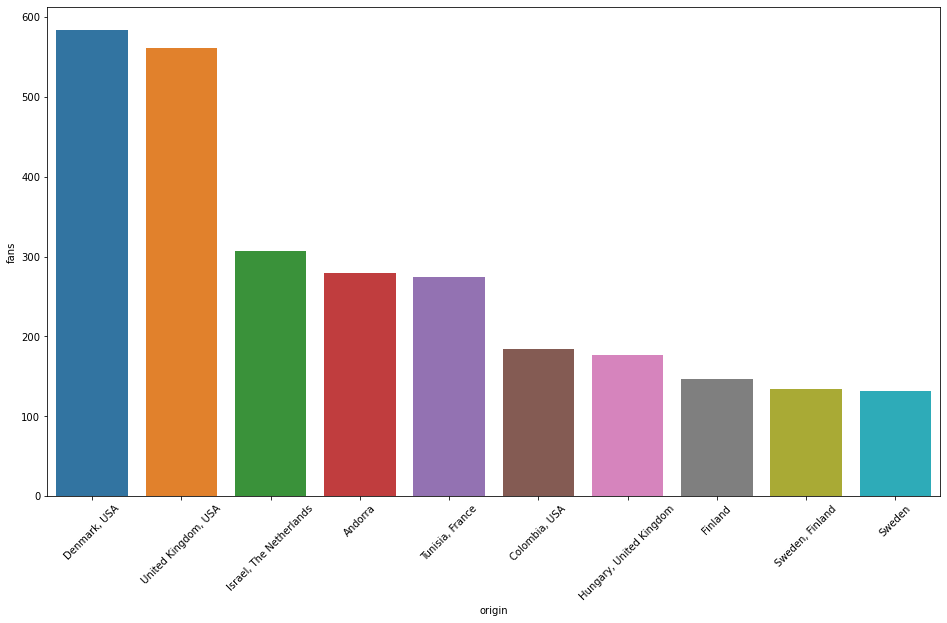

In [30]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
sns.barplot(data=df_fans_by_country.head(10), x='origin', y='fans');

In [31]:
most_countries = df['origin'].value_counts()
most_countries

USA                                1138
Sweden                              476
Germany                             397
United Kingdom                      344
Finland                             307
                                   ... 
United Kingdom, Greece                1
Ukraine, Canada                       1
Greece, USA                           1
Bahrain                               1
Bosnia and Herzegovina, Croatia       1
Name: origin, Length: 113, dtype: int64

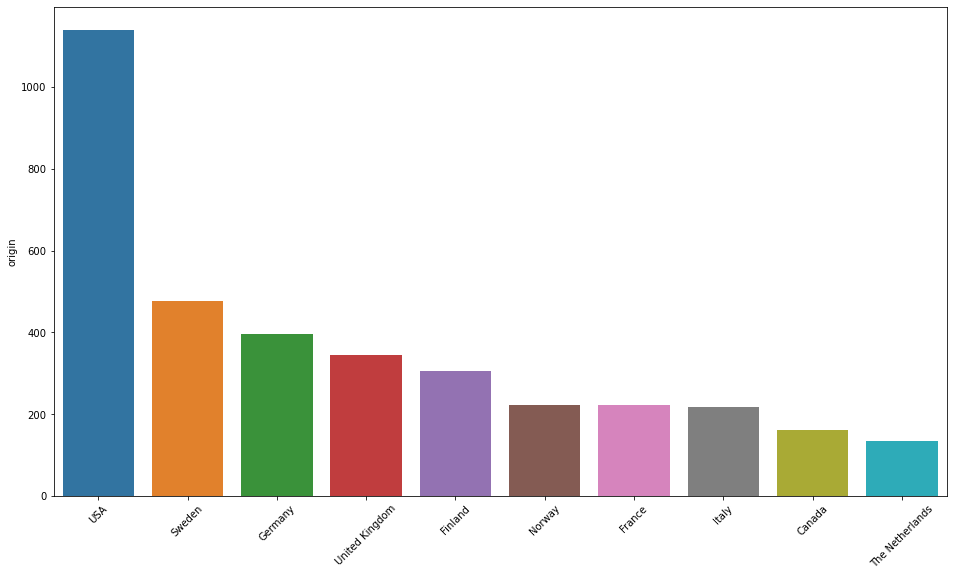

In [32]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
sns.barplot(x=most_countries.index[:10], y=most_countries[:10]);

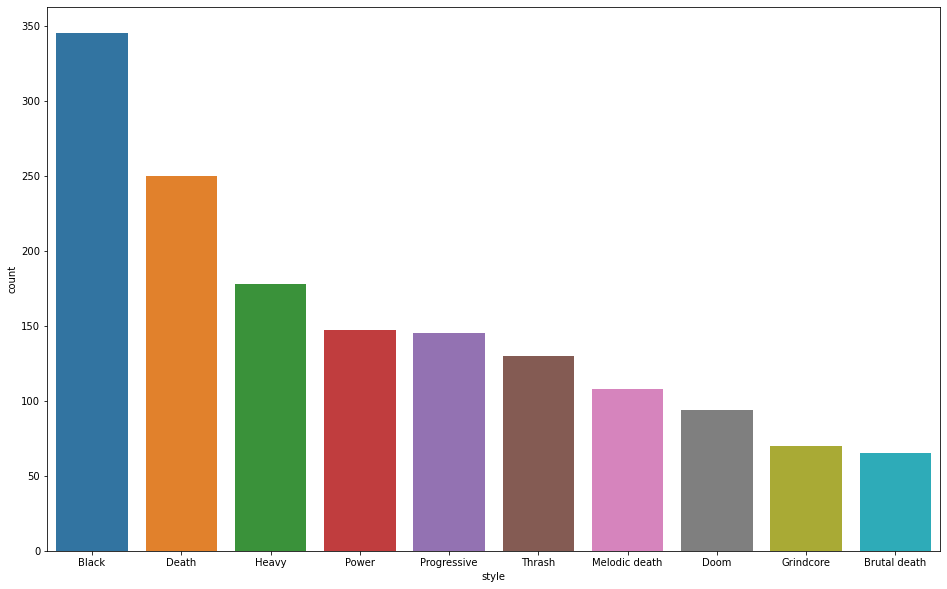

In [33]:
plot_order = df['style'].value_counts().index.values
plt.figure(figsize=(16,10))
sns.countplot(data=df, x='style', order=plot_order[:10]);